There are 3 Rs 1 coins and 2 Rs 2 coins, with diameters (in cm) given by [2.140560404225999, 2.1773082223242994, 2.1956821313734496, 2.489664676159853, 2.6734037666513553]


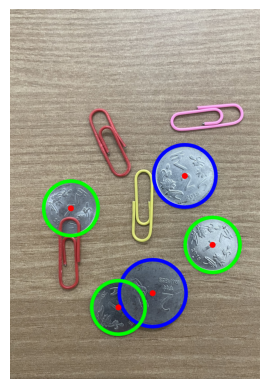

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.cvtColor(cv2.imread(r"C:\Users\DELL\Downloads\image.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_blurred = cv2.GaussianBlur(gray, [11, 11], 1)

detected_circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 100, param1=200, param2=100, minRadius=100,maxRadius=300)
two_rupee, one_rupee = 0,0
diameter_list = []
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for x,y,r in detected_circles[0, :]:
        actual_diameter = 2*r*10/image.shape[1]
        
        if actual_diameter >= 2.3:
            cv2.circle(image, (x, y), r, [0, 0, 255], 30)
            two_rupee += 1
        else: 
            cv2.circle(image, (x, y), r, [0, 255, 0], 30)
            one_rupee += 1
            
        cv2.circle(image, (x, y), 1, [255, 0, 0], 50)
        
        diameter_list.append(actual_diameter)

diameter_list.sort()

print(f"There are {one_rupee} Rs 1 coins and {two_rupee} Rs 2 coins, with diameters (in cm) given by {diameter_list}")
plt.imshow(image)
plt.axis("OFF")
plt.show()